<a href="https://colab.research.google.com/github/fatemafaria142/Precision-Crop-Recommendation-with-Machine-Learning-Algorithms/blob/main/Crop_Recommendation_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Pip 21.3+ is required
!pip install xgboost

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

In [3]:
file_path = "data\data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the DataFrame
print("First few rows:")
df.head()

First few rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# Step 1: Label Encoding for 'label' column
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [29]:
# Print the mapping between original labels and encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [7]:
# Step 2: MinMax Scaling for numerical columns
scaler = MinMaxScaler()
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [8]:
# Step 3: Drop 'label' column
X = df.drop('label', axis=1)
y = df['label']

In [9]:
# Step 4: Train-Test Split (80% train, 20% test) with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Create XGBoost model for multiclass classification
model = xgb.XGBClassifier(objective='multi:softmax', num_class=22, random_state=42)

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=22,
              num_parallel_tree=None, ...)

In [21]:
# Predictions on the test set
y_pred = model.predict(X_test)

In [23]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for precision in multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for recall in multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Use weighted average for F1 score in multiclass
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9932
Precision: 0.9935
Recall: 0.9932
F1 Score: 0.9931


<ipython-input-53-9f10b5ae4c33>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Metric', y='Value', data=metrics_df, palette=custom_colors, dodge=False)


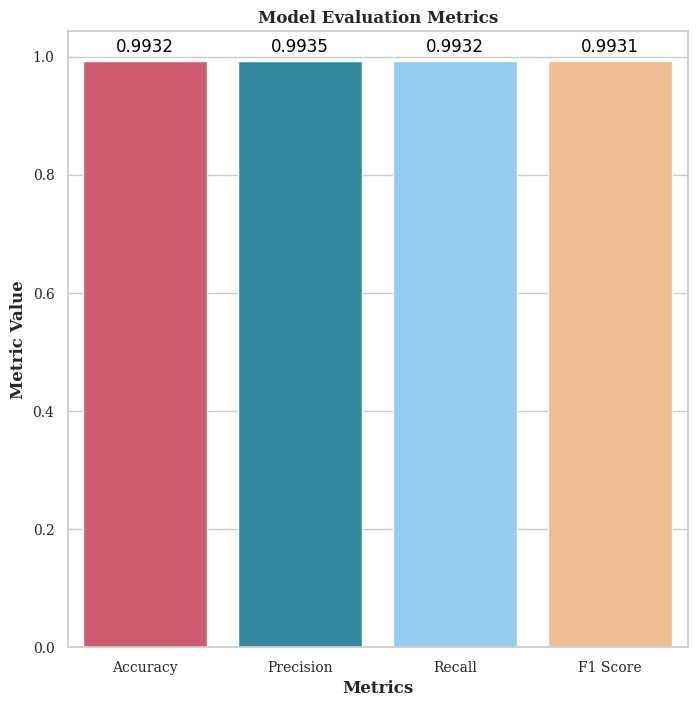

In [53]:
# Create a dictionary with metric names and values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Convert the dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])

# Define custom colors for the bars
custom_colors = ['#e34861', '#2595b0', '#84d0ff', '#ffbb84']

# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

plt.rcParams["figure.figsize"] = (8, 8)

# Use the hue parameter instead of palette
bar_plot = sns.barplot(x='Metric', y='Value', data=metrics_df, palette=custom_colors, dodge=False)

# Set title and axis labels using custom fontdict
plt.xlabel('Metrics',fontdict=font)
plt.ylabel('Metric Value',fontdict=font)
plt.title('Model Evaluation Metrics',fontdict=font)

# Annotate the bars with their values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.4f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

# Set custom font for ticks on both x and y axes with rotation
plt.xticks(fontname='Serif', fontsize=10)
plt.yticks(fontname='Serif', fontsize=10)

# Show the plot
plt.show()


In [24]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

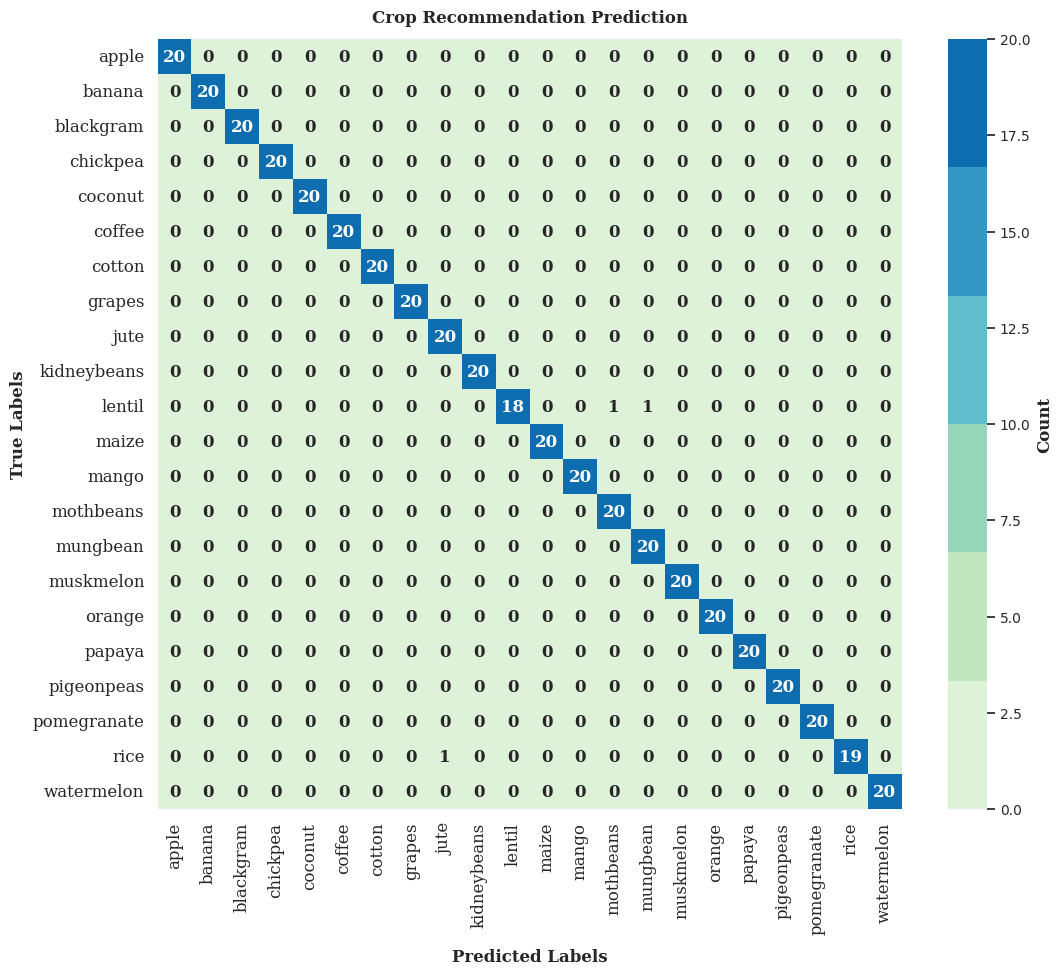

In [55]:
# Plot confusion matrix
plt.figure(figsize=(12, 10))
# Define the custom palette
custom_palette = sns.color_palette(palette='GnBu')# Modify the number based on number of classes in the dataset
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
                      yticklabels=['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon'],
                      annot_kws={"family": "Serif",'weight': 'bold', 'size': 12})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font)
heatmap.set_ylabel('True Labels', fontdict=font)
heatmap.set_title('Crop Recommendation Prediction', fontdict=font, pad=12)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', fontdict=font)
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
plt.show()